## 인코딩
- 결측치 없는 컬럼 Label Encoder로 encoding 실행
- 결측치 유지 후 인코딩
- 실측치 있는 컬럼 : 수동 변환 

## 이상치 처리
- 무엇을 이상치라 간주할 수 있는지 고민해보기

## 결측치 처리
- 스케일링 진행한 dataframe, 진행하지 않은 dataframe 구분하기
- 스케일링 진행한 df 
- (1) log 변환 + scaling o - KNN imputer 전체 적용, KNN imputer 연관성 있는 컬럼끼리 적용
- (2) log 변환 + scaling x - 동일하게 적용
- 스케일링 진행 x df
- 컬럼별 특성에 따라 개별 처리

## 범주화
- age 범주화 > 범주화가 가능한 다른 컬럼은 무엇이 있는가? + 범주화 컬럼 encoding

## 불균형 데이터 처리방법
- 오버샘플링

## 모델링
- boosting 기반, tree 기반, 인공신경망

# 패키지 불러오기

In [43]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action = 'ignore')
# plt.colormaps()

# 데이터 로딩

In [45]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['font.family'] = 'Malgun Gothic'    

train = pd.read_csv('train.csv')

# 결측치 확인

In [29]:
# 각 컬럼별 결측치, 데이터타입 확인 가능한 데이터프레임
ncounts = train.isna().sum().values
df1 = DataFrame({'dtypes' : train.dtypes, 'ncount' : ncounts})
# 결측치가 없는 ojbect 타입의 컬럼 리스트
char_cols = list(df1.loc[(df1['dtypes'] == 'object') & (df1['ncount'] == 0), :].index)
df1

,dtypes,ncount
id,int64,0
Age,float64,94
TypeofContact,object,10
CityTier,int64,0
DurationOfPitch,float64,102
Occupation,object,0
Gender,object,0
NumberOfPersonVisiting,int64,0
NumberOfFollowups,float64,13
ProductPitched,object,0


In [88]:
# Gender 컬럼 value 값 변환
train['Gender'] = train['Gender'].replace('Fe Male', 'Female')
test['Gender'] = test['Gender'].replace('Fe Male', 'Female')

# EDA

In [35]:
# 0 : 신청 안 함의 데이터 수가 1 : 신청함의 수보다 훨씬 많음
train['ProdTaken'].value_counts()

0    1572
1     383
Name: ProdTaken, dtype: int64

In [40]:
# 독립변수 결측치 비율
missing_df = train.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / train.shape[0]
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
0,Age,94,0.05
1,TypeofContact,10,0.01
3,DurationOfPitch,102,0.05
7,NumberOfFollowups,13,0.01
9,PreferredPropertyStar,10,0.01
11,NumberOfTrips,57,0.03
15,NumberOfChildrenVisiting,27,0.01
17,MonthlyIncome,100,0.05


In [83]:
# 각 독립 변수별 종속변수 분포 비율
def bar_chart(feature) :
    prodnot = train[train['ProdTaken'] == 0][feature].value_counts()
    prodtaken = train[train['ProdTaken'] == 1][feature].value_counts()
    
    df1 = pd.DataFrame([prodnot, prodtaken])
    df1.index = ['Product Not Taken', 'Product Taken']
    df1.plot(kind='bar', stacked = True, figsize = (10, 5), cmap = 'Pastel2')

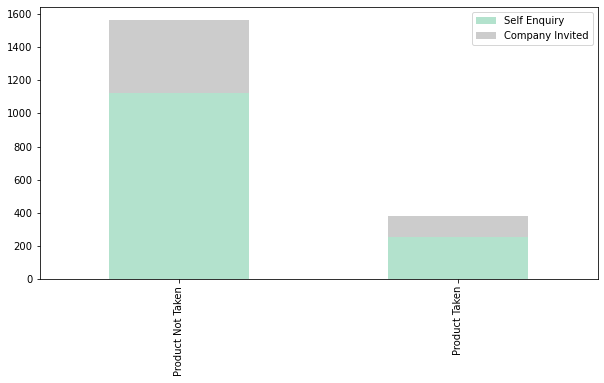

In [84]:
bar_chart('TypeofContact')

In [66]:
# TypeofContact 컬럼의 결측치는 어느 종속 변수에서 발행했는지
train.loc[train['TypeofContact'].isnull(), 'ProdTaken'].value_counts()

0    8
1    2
Name: ProdTaken, dtype: int64

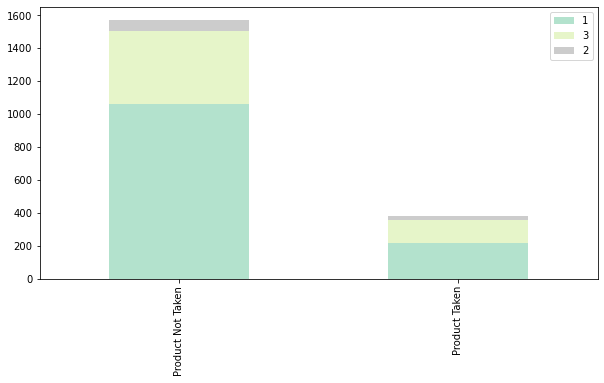

In [77]:
bar_chart('CityTier')

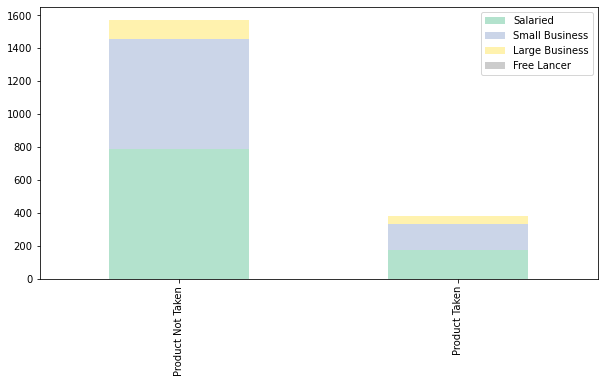

In [85]:
bar_chart('Occupation')

In [152]:
# 상품가입여부 > row마다 groupby 직업별 회사원, 공무원 상품가입 총수 : 두집단의 유의미한 차이가 있는가? 집단별 특정값 차이 anova 검정
# 그룹별 상품가입 유의미한 의미가 나왔다  
DataFrame(train.groupby('Occupation')['ProdTaken'].value_counts()).rename_axis(['Occupation', 'ProdTaken_01']).reset_index(name = k)

,Occupation,ProdTaken_01,ProdTaken
0,Free Lancer,1,1
1,Large Business,0,116
2,Large Business,1,47
3,Salaried,0,788
4,Salaried,1,177
5,Small Business,0,668
6,Small Business,1,158


In [113]:
stats.chi2_contingency(observed = result)

(14.013100928739538,
 0.002887374294640383,
 3,
 array([[8.04092072e-01, 1.95907928e-01],
        [1.31067008e+02, 3.19329923e+01],
        [7.75948849e+02, 1.89051151e+02],
        [6.64180051e+02, 1.61819949e+02]]))

In [112]:
stats.chi2_contingency(observed = result)[3].astype('str')

array([['0.8040920716112532', '0.1959079283887468'],
       ['131.06700767263428', '31.932992327365728'],
       ['775.9488491048594', '189.05115089514067'],
       ['664.1800511508951', '161.81994884910486']], dtype='<U32')

In [ ]:
# 독립표본에 대한 비교
train['Occupation']

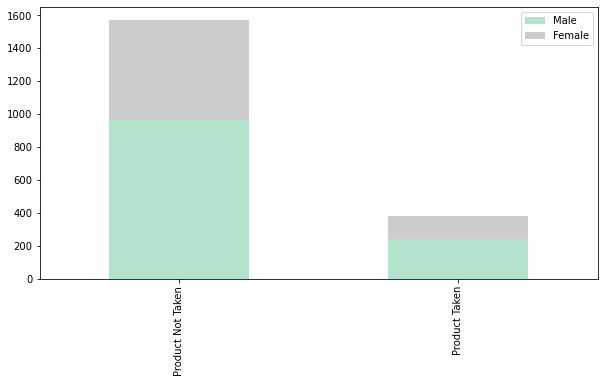

In [89]:
bar_chart('Gender')

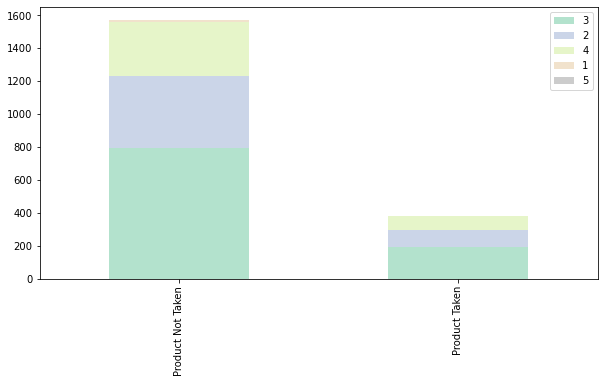

In [90]:
bar_chart('NumberOfPersonVisiting')

In [91]:
train['NumberOfPersonVisiting'].value_counts()

3    988
2    543
4    412
1     11
5      1
Name: NumberOfPersonVisiting, dtype: int64

In [93]:
# 함께 가는 인원 5명인 1 row > Prod Not Taken
train.loc[train['NumberOfPersonVisiting'] == 5, 'ProdTaken']

408    0
Name: ProdTaken, dtype: int64

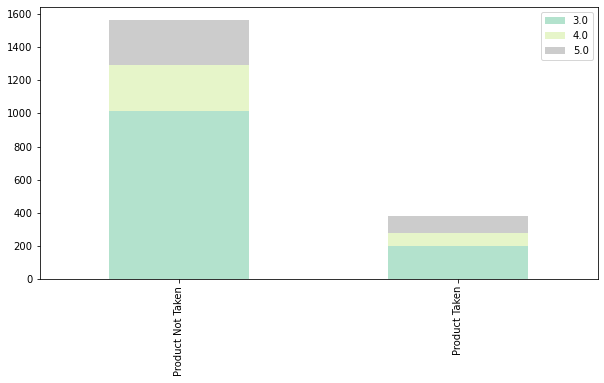

In [96]:
bar_chart('PreferredPropertyStar')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


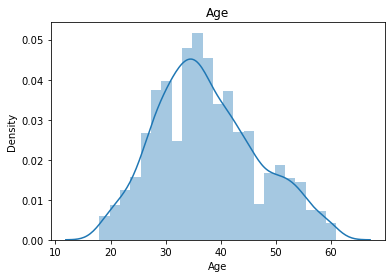

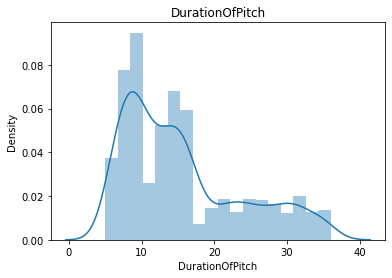

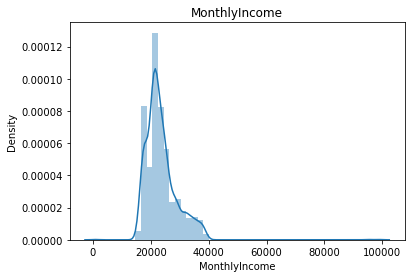

In [98]:
# 단변수 탐색
numerical_feature = ['Age', 'DurationOfPitch', 'MonthlyIncome']

for col in numerical_feature :
    sns.distplot(train.loc[train[col].notnull(), col])
    plt.title(col)
    plt.show()

In [99]:
! pip install pandas-profiling

     |████████████████████████████████| 268 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 694 kB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 92.3 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 42.0 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 75.3 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=5141b1d9efd185aa9714234fcc426cbcc0009e732caf351706011b461e580d76
  Stored in directory: /Users/estellaseo/Library/Caches/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [100]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [103]:
profile = ProfileReport(train, title = 'ProdTaken Prediction')
profile.to_file(output_file = 'ProdTaken Prediction.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 인코딩

In [30]:
m_le = LabelEncoder()
for i in char_cols :
    m_le.fit(train[i])
    train[i] = m_le.transform(train[i])

print(char_cols)
train.info()

['Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   int64  
 6   Gender                    1955 non-null   int64  
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   int64  
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   int64  
 12  NumberOfTrips             1898 non-null   f

In [15]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [31]:
# 쓸모없는 컬럼(id) 제거하기
train = train.drop('id', axis = 1)
train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.00,Company Invited,1,10.00,3,1,3,4.00,0,3.00,1,3.00,0,1,0,1.00,1,20384.00,0
1,34.00,Self Enquiry,3,NaN,3,0,2,4.00,1,4.00,2,1.00,1,5,1,0.00,2,19599.00,1
2,45.00,Company Invited,1,NaN,2,1,2,3.00,1,4.00,1,2.00,0,4,1,0.00,2,NaN,0
3,29.00,Company Invited,1,7.00,3,1,3,5.00,0,4.00,1,3.00,0,4,0,1.00,1,21274.00,1
4,42.00,Self Enquiry,3,6.00,2,1,2,3.00,1,3.00,0,2.00,0,3,1,0.00,2,19907.00,0


In [23]:
# manual encoding이 필요한 컬럼 : TypeofContact
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1861 non-null   float64
 1   TypeofContact             1945 non-null   object 
 2   CityTier                  1955 non-null   int64  
 3   DurationOfPitch           1853 non-null   float64
 4   Occupation                1955 non-null   int64  
 5   Gender                    1955 non-null   int64  
 6   NumberOfPersonVisiting    1955 non-null   int64  
 7   NumberOfFollowups         1942 non-null   float64
 8   ProductPitched            1955 non-null   int64  
 9   PreferredPropertyStar     1945 non-null   float64
 10  MaritalStatus             1955 non-null   int64  
 11  NumberOfTrips             1898 non-null   float64
 12  Passport                  1955 non-null   int64  
 13  PitchSatisfactionScore    1955 non-null   int64  
 14  OwnCar  

In [25]:
train['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry', nan], dtype=object)

In [34]:
train['TypeofContact'] = train['TypeofContact'].replace('Company Invited', 0)
train['TypeofContact'] = train['TypeofContact'].replace('Self Enquiry', 1)
train['TypeofContact'] = train['TypeofContact'].astype('float')
train.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,28.00,0.00,1,10.00,3,1,3,4.00,0,3.00,1,3.00,0,1,0,1.00,1,20384.00,0
1,34.00,1.00,3,NaN,3,0,2,4.00,1,4.00,2,1.00,1,5,1,0.00,2,19599.00,1
2,45.00,0.00,1,NaN,2,1,2,3.00,1,4.00,1,2.00,0,4,1,0.00,2,NaN,0
3,29.00,0.00,1,7.00,3,1,3,5.00,0,4.00,1,3.00,0,4,0,1.00,1,21274.00,1
4,42.00,1.00,3,6.00,2,1,2,3.00,1,3.00,0,2.00,0,3,1,0.00,2,19907.00,0
